In [ ]:
# Import packagaes, read in the file, show the first 3 rows.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
import scipy.stats as stats
import seaborn as sns
import missingno as msno
from sklearn.decomposition import PCA
from sklearn import linear_model
import statistics
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.stats.diagnostic import normal_ad

df = pd.read_csv(r'/Users/michaelhelvajian/Documents/GitHub/Useful-Scripts/MSH_medical_data.csv',dtype={'locationid':np.int64})
df.head(3)

In [73]:
# Research question: 
# What medical conditions or Gender values (independent variables)  contribute to Additional_charges (dependent continuous variable)? 
# Medical conditions: 'HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma'
# Continuous Variables: 'Children', 'Age', 'Income', 'Doc_visits'
# Categorical Variables: 'Gender', 'Complication_risk'

# Research question: 
# What contribute to a patient's readmission (dependent categorical variable)?

In [74]:
# We'll start by examining the data types present in the data file and their count of non-null values.
# We'll want to look more closely at columns that contain < 10000 values.

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [75]:
# Next, we'll determine if there are duplicate rows in the data set. 
# We'll do that by calling the .duplicated() method and .value_counts() method on the dataframe. 
# We want to see this evaluate to "False" and show 10000.

print(df.duplicated().value_counts())

False    10000
dtype: int64


In [76]:
# We'll next print the unique values in specific columns calling the .unique() method.
# We'll do this to compare the categorical values to the # of unique values for the following:
# Education, Employment, Services, Complication_risk, initial_admin, marital, area, state, city
# We can examine each unique value to determine if the value makes sense or the column requires further cleaning.

print(df.Complication_risk.unique())
print(df.Children.unique())
print(df.Gender.unique())
print(df.Doc_visits.unique())
print(df.HighBlood.unique())
print(df.Stroke.unique())
print(df.Overweight.unique())
print(df.Arthritis.unique())
print(df.Diabetes.unique())
print(df.Hyperlipidemia.unique())
print(df.BackPain.unique())
print(df.Anxiety.unique())
print(df.Allergic_rhinitis.unique())
print(df.Reflux_esophagitis.unique())
print(df.Asthma.unique())

['Medium' 'High' 'Low']
[ 1  3  0  7  2  4 10  5  8  6  9]
['Male' 'Female' 'Nonbinary']
[6 4 5 7 3 2 8 9 1]
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['Yes' 'No']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['Yes' 'No']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']


In [77]:
# To attribute a more specific data type to columns that have a fixed number of unique values to a category type we'll call the .astype() method. 
# We're doing this because a categorical variable takes on a limited, and usually fixed, number of possible values
# Citation https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html

df['Marital'] = df['Marital'].astype('category')
df['State'] = df['State'].astype('category')
df['Area'] = df['Area'].astype('category')
df['Initial_admin'] = df['Initial_admin'].astype('category')
df['Services'] = df['Services'].astype('category')

In [78]:
# Change the values in the columns that are supposed to have Yes/No to having those values. 
# We're doing this so make these columns standardardized and allow for easier manipulation
# Citation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html
# Citation: Textbook Page 33
# Then, we replace "Yes" with 1 and "No" with 0

df['Complication_risk'] = df['Complication_risk'].replace({"Low":1,"Medium":2,"High":3})
df['Gender'] = df['Gender'].replace({"Male":1,"Female":2,"Nonbinary":3})
df['ReAdmis'] = df['ReAdmis'].replace({"Yes":1,"No":0})
df['Soft_drink'] = df['Soft_drink'].replace({"Yes":1,"No":0})
df['HighBlood'] = df['HighBlood'].replace({"Yes":1,"No":0})
df['Stroke'] = df['Stroke'].replace({"Yes":1,"No":0})
df['Overweight'] = df['Overweight'].replace({"Yes":1,"No":0})
df['Arthritis'] = df['Arthritis'].replace({"Yes":1,"No":0})
df['Diabetes'] = df['Diabetes'].replace({"Yes":1,"No":0})
df['Hyperlipidemia'] = df['Hyperlipidemia'].replace({"Yes":1,"No":0})
df['BackPain'] = df['BackPain'].replace({"Yes":1,"No":0})
df['Anxiety'] = df['Anxiety'].replace({"Yes":1,"No":0})
df['Allergic_rhinitis'] = df['Allergic_rhinitis'].replace({"Yes":1,"No":0})
df['Reflux_esophagitis'] = df['Reflux_esophagitis'].replace({"Yes":1,"No":0})
df['Asthma'] = df['Asthma'].replace({"Yes":1,"No":0})

In [79]:
print(df.Complication_risk.unique())
print(df.Children.unique())
print(df.Gender.unique())
print(df.Doc_visits.unique())
print(df.HighBlood.unique())
print(df.Stroke.unique())
print(df.Overweight.unique())
print(df.Arthritis.unique())
print(df.Diabetes.unique())
print(df.Hyperlipidemia.unique())
print(df.BackPain.unique())
print(df.Anxiety.unique())
print(df.Allergic_rhinitis.unique())
print(df.Reflux_esophagitis.unique())
print(df.Asthma.unique())

[2 3 1]
[ 1  3  0  7  2  4 10  5  8  6  9]
[1 2 3]
[6 4 5 7 3 2 8 9 1]
[1 0]
[0 1]
[0 1]
[1 0]
[1 0]
[0 1]
[1 0]
[1 0]
[1 0]
[0 1]
[1 0]


In [80]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   CaseOrder           10000 non-null  int64   
 1   Customer_id         10000 non-null  object  
 2   Interaction         10000 non-null  object  
 3   UID                 10000 non-null  object  
 4   City                10000 non-null  object  
 5   State               10000 non-null  category
 6   County              10000 non-null  object  
 7   Zip                 10000 non-null  int64   
 8   Lat                 10000 non-null  float64 
 9   Lng                 10000 non-null  float64 
 10  Population          10000 non-null  int64   
 11  Area                10000 non-null  category
 12  TimeZone            10000 non-null  object  
 13  Job                 10000 non-null  object  
 14  Children            10000 non-null  int64   
 15  Age                 10000 non-null  i

In [81]:
# Visualize the medical conditions (11) and Children, Age, Income, Doc Visits (continuous), Gender and Complication Risk (categorical) independent variables. 

<AxesSubplot:title={'center':'High Blood Categorical Distribution'}, ylabel='Count of Rows'>

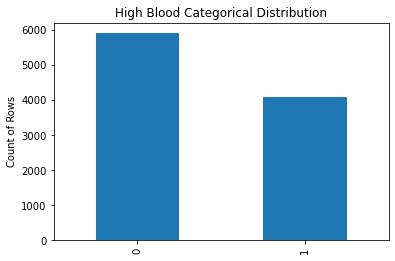

In [82]:
# Distribution of categorical variable 1 "HighBlood" using univariate statistics.

df.HighBlood.value_counts().plot(kind='bar', title='High Blood Categorical Distribution', ylabel='Count of Rows')

<AxesSubplot:title={'center':'Stroke Categorical Distribution'}, ylabel='Count of Rows'>

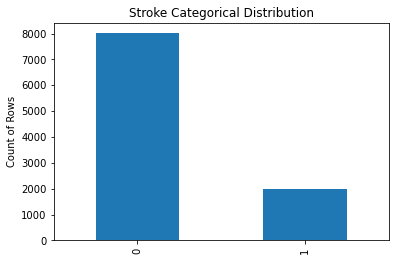

In [83]:
# Distribution of categorical variable 1 "Stroke" using univariate statistics.

df.Stroke.value_counts().plot(kind='bar', title='Stroke Categorical Distribution', ylabel='Count of Rows')

<AxesSubplot:title={'center':'Overweight Categorical Distribution'}, ylabel='Count of Rows'>

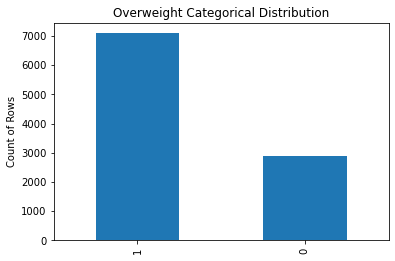

In [84]:
# Distribution of categorical variable 1 "Overweight" using univariate statistics.

df.Overweight.value_counts().plot(kind='bar', title='Overweight Categorical Distribution', ylabel='Count of Rows')

<AxesSubplot:title={'center':'Arthritis Categorical Distribution'}, ylabel='Count of Rows'>

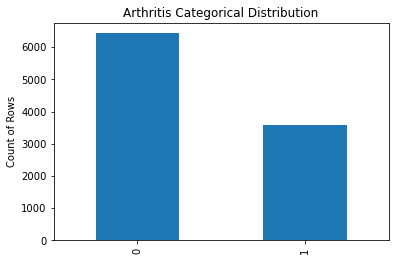

In [85]:
# Distribution of categorical variable 1 "Arthritis" using univariate statistics.

df.Arthritis.value_counts().plot(kind='bar', title='Arthritis Categorical Distribution', ylabel='Count of Rows')

<AxesSubplot:title={'center':'Diabetes Categorical Distribution'}, ylabel='Count of Rows'>

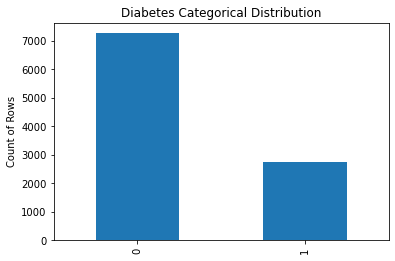

In [86]:
# Distribution of categorical variable 1 "Diabetes" using univariate statistics.

df.Diabetes.value_counts().plot(kind='bar', title='Diabetes Categorical Distribution', ylabel='Count of Rows')

<AxesSubplot:title={'center':'Hyperlipidemia Categorical Distribution'}, ylabel='Count of Rows'>

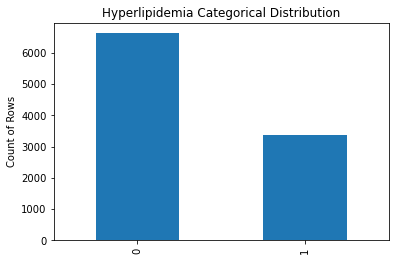

In [87]:
# Distribution of categorical variable 1 "Hyperlipidemia" using univariate statistics.

df.Hyperlipidemia.value_counts().plot(kind='bar', title='Hyperlipidemia Categorical Distribution', ylabel='Count of Rows')

<AxesSubplot:title={'center':'BackPain Categorical Distribution'}, ylabel='Count of Rows'>

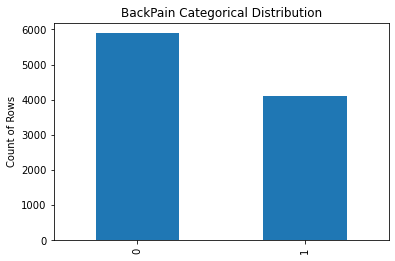

In [88]:
# Distribution of categorical variable 1 "BackPain" using univariate statistics.

df.BackPain.value_counts().plot(kind='bar', title='BackPain Categorical Distribution', ylabel='Count of Rows')

<AxesSubplot:title={'center':'Anxiety Categorical Distribution'}, ylabel='Count of Rows'>

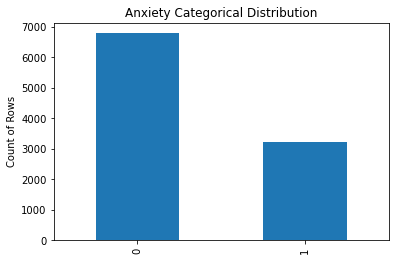

In [89]:
# Distribution of categorical variable 1 "Anxiety" using univariate statistics.

df.Anxiety.value_counts().plot(kind='bar', title='Anxiety Categorical Distribution', ylabel='Count of Rows')

<AxesSubplot:title={'center':'Allergic Rhinitis Categorical Distribution'}, ylabel='Count of Rows'>

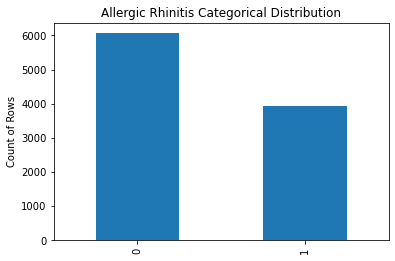

In [90]:
# Distribution of categorical variable 1 "Allergic_rhinitis" using univariate statistics.

df.Allergic_rhinitis.value_counts().plot(kind='bar', title='Allergic Rhinitis Categorical Distribution', ylabel='Count of Rows')

<AxesSubplot:title={'center':'Reflux Esophagitis Categorical Distribution'}, ylabel='Count of Rows'>

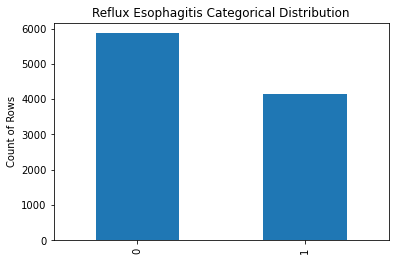

In [91]:
# Distribution of categorical variable 1 "Reflux_esophagitis" using univariate statistics.

df.Reflux_esophagitis.value_counts().plot(kind='bar', title='Reflux Esophagitis Categorical Distribution', ylabel='Count of Rows')

<AxesSubplot:title={'center':'Asthma Categorical Distribution'}, ylabel='Count of Rows'>

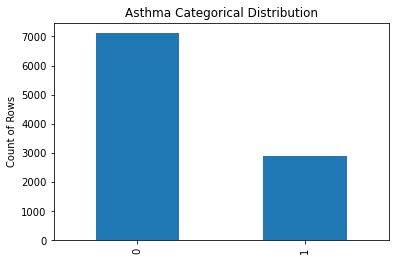

In [92]:
# Distribution of categorical variable 1 "Asthma" using univariate statistics.

df.Asthma.value_counts().plot(kind='bar', title='Asthma Categorical Distribution', ylabel='Count of Rows')

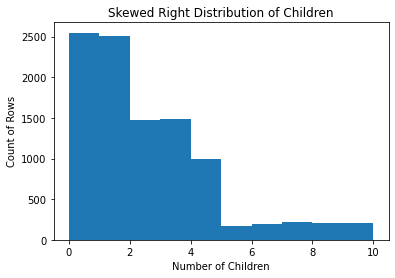

In [93]:
# Distribution of continuous variable "Children" using univariate statistics.
plt.hist(df['Children'])
plt.xlabel("Number of Children")
plt.ylabel("Count of Rows")
plt.title('Skewed Right Distribution of Children')
plt.show()

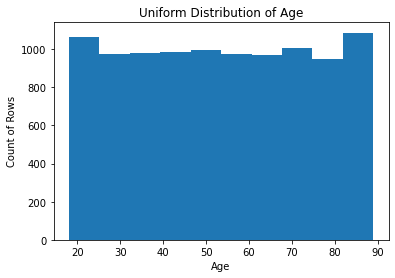

In [94]:
# Distribution of continuous variable "Children" using univariate statistics.
plt.hist(df['Age'])
plt.xlabel("Age")
plt.ylabel("Count of Rows")
plt.title('Uniform Distribution of Age')
plt.show()

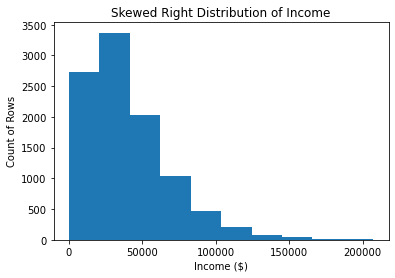

In [95]:
# Distribution of continuous variable "Children" using univariate statistics.
plt.hist(df['Income'])
plt.xlabel("Income ($)")
plt.ylabel("Count of Rows")
plt.title('Skewed Right Distribution of Income')
plt.show()

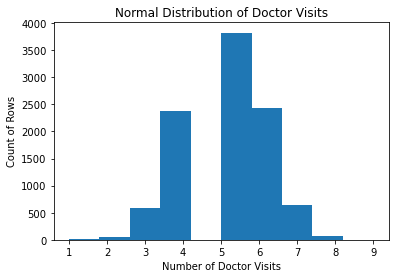

In [96]:
# Distribution of continuous variable "Children" using univariate statistics.
plt.hist(df['Doc_visits'])
plt.xlabel("Number of Doctor Visits")
plt.ylabel("Count of Rows")
plt.title('Normal Distribution of Doctor Visits')
plt.show()

<AxesSubplot:title={'center':'Gender Categorical Distribution'}, ylabel='Count of Rows'>

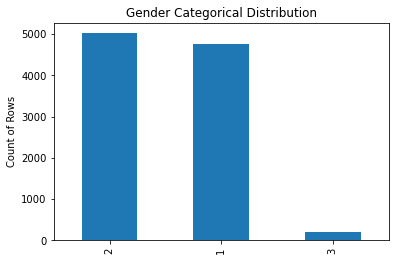

In [97]:
# Distribution of categorical variable 1 "Gender" using univariate statistics.

df.Gender.value_counts().plot(kind='bar', title='Gender Categorical Distribution', ylabel='Count of Rows')

<AxesSubplot:title={'center':'Complication Risk Categorical Distribution'}, ylabel='Count of Rows'>

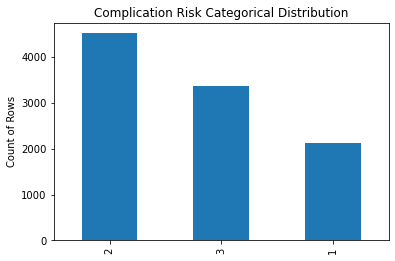

In [98]:
# Distribution of categorical variable "Complication_risk" using univariate statistics.

df.Complication_risk.value_counts().plot(kind='bar', title='Complication Risk Categorical Distribution', ylabel='Count of Rows')

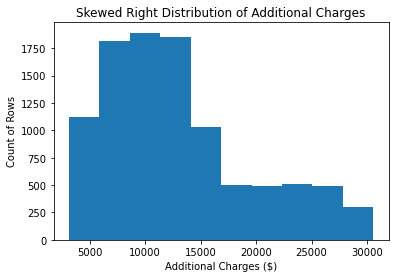

In [99]:
# Distribution of continuous variable 2 "Additional_charges" using univariate statistics.
plt.hist(df['Additional_charges'])
plt.xlabel("Additional Charges ($)")
plt.ylabel("Count of Rows")
plt.title('Skewed Right Distribution of Additional Charges')
plt.show()

In [100]:
# Describing the values of "Additional_charges" to find the count, mean, and standard deviation.
df['Additional_charges'].describe()

count    10000.000000
mean     12934.528587
std       6542.601544
min       3125.703000
25%       7986.487755
50%      11573.977735
75%      15626.490000
max      30566.070000
Name: Additional_charges, dtype: float64

In [101]:
# Identifying outlier for Additional_charges to see if our distribution can be less skewed by removing outliers. 
# There are no outliers. 
df['Z_Score_Additional_charges'] = stats.zscore(df['Additional_charges'])
Additional_charges_Outliers = df.Z_Score_Additional_charges.loc[(df['Z_Score_Additional_charges'] > 3.0) | (df['Z_Score_Additional_charges'] < -3.0)]
print(len(Additional_charges_Outliers))

0


In [102]:
# Identifying outlier for Children to see if our distribution can be less skewed by removing outliers. 
# There are 202 outliers.
df['Z_Score_Children'] = stats.zscore(df['Children'])
Children_Outliers = df.Z_Score_Children.loc[(df['Z_Score_Children'] > 3.0) | (df['Z_Score_Children'] < -3.0)]
print(len(Children_Outliers))

202


In [103]:
# Identifying outlier for Age to see if our distribution can be less skewed by removing outliers. 
# There are no outliers.
df['Z_Score_Age'] = stats.zscore(df['Age'])
Age_Outliers = df.Z_Score_Age.loc[(df['Z_Score_Age'] > 3.0) | (df['Z_Score_Age'] < -3.0)]
print(len(Age_Outliers))

0


In [104]:
# Identifying outlier for Income to see if our distribution can be less skewed by removing outliers. 
# There are 143 outliers.
df['Z_Score_Income'] = stats.zscore(df['Income'])
Income_Outliers = df.Z_Score_Income.loc[(df['Z_Score_Income'] > 3.0) | (df['Z_Score_Income'] < -3.0)]
print(len(Income_Outliers))

143


In [105]:
# Identifying outlier for Doc_visits to see if our distribution can be less skewed by removing outliers. 
# There are 8 outliers.
df['Z_Score_Doc_visits'] = stats.zscore(df['Doc_visits'])
Doc_visits_Outliers = df.Z_Score_Doc_visits.loc[(df['Z_Score_Doc_visits'] > 3.0) | (df['Z_Score_Doc_visits'] < -3.0)]
print(len(Doc_visits_Outliers))

8


[Text(0.5, 1.0, 'High Blood by Additional Charges')]

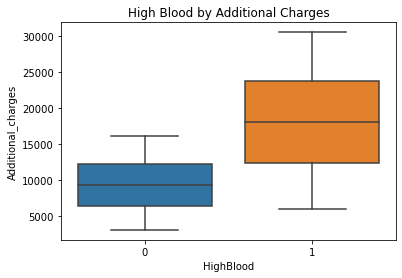

In [106]:
# Distribution of categorical variable "HighBlood" and continuous variable "Additional_charges" using bivariate statistics.
sns.boxplot(x='HighBlood', y='Additional_charges', data=df).set(title='High Blood by Additional Charges')

[Text(0.5, 1.0, 'Stroke by Additional Charges')]

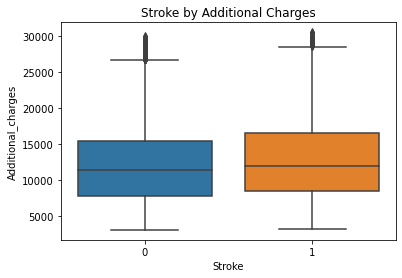

In [107]:
# Distribution of categorical variable "Stroke" and continuous variable "Additional_charges" using bivariate statistics.
sns.boxplot(x='Stroke', y='Additional_charges', data=df).set(title='Stroke by Additional Charges')

[Text(0.5, 1.0, 'Overweight by Additional Charges')]

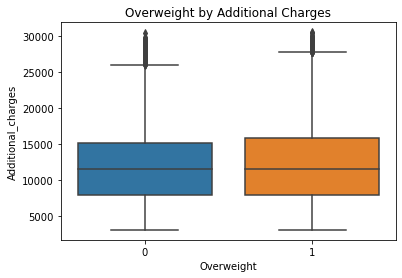

In [108]:
# Distribution of categorical variable "Overweight" and continuous variable "Additional_charges" using bivariate statistics.
sns.boxplot(x='Overweight', y='Additional_charges', data=df).set(title='Overweight by Additional Charges')

[Text(0.5, 1.0, 'Arthritis by Additional Charges')]

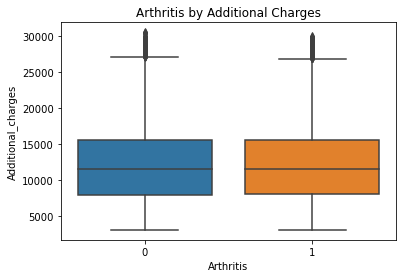

In [109]:
# Distribution of categorical variable "Arthritis" and continuous variable "Additional_charges" using bivariate statistics.
sns.boxplot(x='Arthritis', y='Additional_charges', data=df).set(title='Arthritis by Additional Charges')

[Text(0.5, 1.0, 'Diabetes by Additional Charges')]

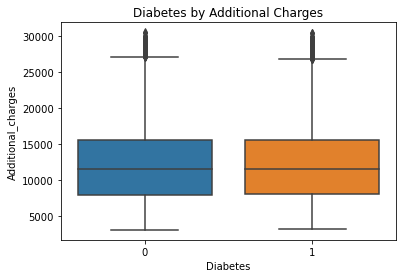

In [110]:
# Distribution of categorical variable "Diabetes" and continuous variable "Additional_charges" using bivariate statistics.
sns.boxplot(x='Diabetes', y='Additional_charges', data=df).set(title='Diabetes by Additional Charges')

[Text(0.5, 1.0, 'Hyperlipidemia by Additional Charges')]

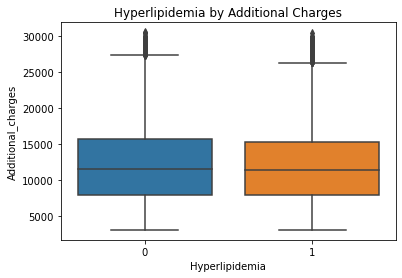

In [111]:
# Distribution of categorical variable "Hyperlipidemia" and continuous variable "Additional_charges" using bivariate statistics.
sns.boxplot(x='Hyperlipidemia', y='Additional_charges', data=df).set(title='Hyperlipidemia by Additional Charges')

[Text(0.5, 1.0, 'Back Pain by Additional Charges')]

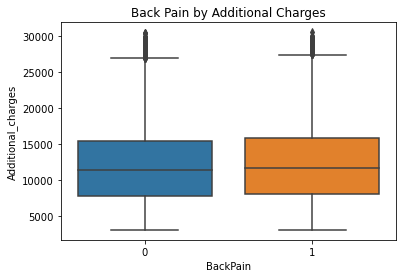

In [112]:
# Distribution of categorical variable "BackPain" and continuous variable "Additional_charges" using bivariate statistics.
sns.boxplot(x='BackPain', y='Additional_charges', data=df).set(title='Back Pain by Additional Charges')

[Text(0.5, 1.0, 'Anxiety by Additional Charges')]

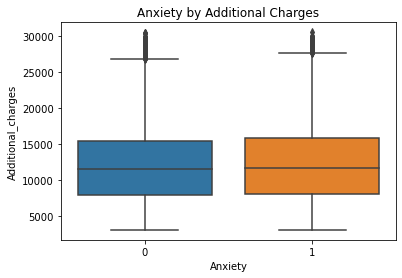

In [113]:
# Distribution of categorical variable "Anxiety" and continuous variable "Additional_charges" using bivariate statistics.
sns.boxplot(x='Anxiety', y='Additional_charges', data=df).set(title='Anxiety by Additional Charges')

[Text(0.5, 1.0, 'Allergic_rhinitis by Additional Charges')]

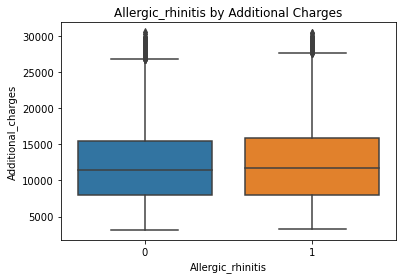

In [114]:
# Distribution of categorical variable "Allergic_rhinitis" and continuous variable "Additional_charges" using bivariate statistics.
sns.boxplot(x='Allergic_rhinitis', y='Additional_charges', data=df).set(title='Allergic_rhinitis by Additional Charges')

[Text(0.5, 1.0, 'Reflux Esophagitis by Additional Charges')]

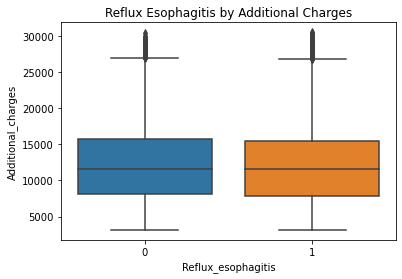

In [115]:
# Distribution of categorical variable "Reflux_esophagitis" and continuous variable "Additional_charges" using bivariate statistics.
sns.boxplot(x='Reflux_esophagitis', y='Additional_charges', data=df).set(title='Reflux Esophagitis by Additional Charges')

[Text(0.5, 1.0, 'Asthma by Additional Charges')]

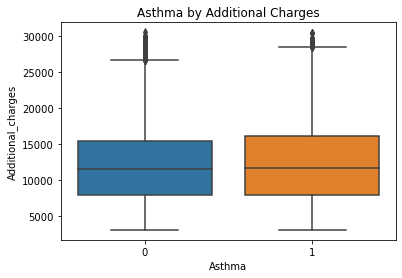

In [116]:
# Distribution of categorical variable "Asthma" and continuous variable "Additional_charges" using bivariate statistics.
sns.boxplot(x='Asthma', y='Additional_charges', data=df).set(title='Asthma by Additional Charges')

[Text(0.5, 1.0, 'Gender by Additional Charges')]

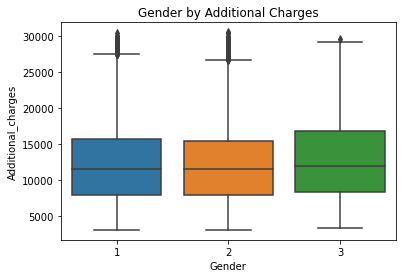

In [117]:
# Distribution of categorical variable "Gender" and continuous variable "Additional_charges" using bivariate statistics.
sns.boxplot(x='Gender', y='Additional_charges', data=df).set(title='Gender by Additional Charges')

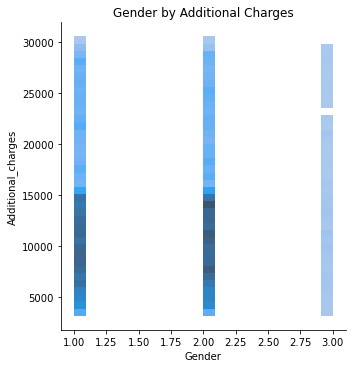

In [118]:
# Distribution of categorical variable "Gender" and continuous variable "Additional_charges" using bivariate statistics.
sns.displot(x='Gender', y='Additional_charges', data=df).set(title='Gender by Additional Charges')

[Text(0.5, 1.0, 'Complication Risk by Additional Charges')]

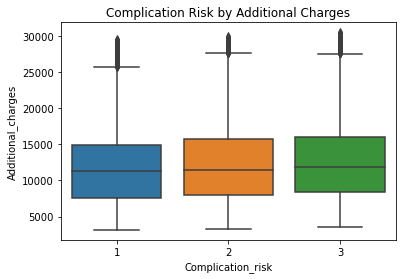

In [119]:
# Distribution of categorical variable "Complication_risk" and continuous variable "Additional_charges" using bivariate statistics.
sns.boxplot(x='Complication_risk', y='Additional_charges', data=df).set(title='Complication Risk by Additional Charges')

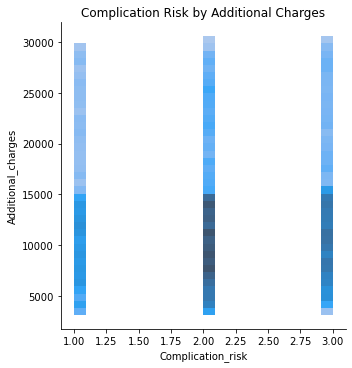

In [120]:
# Distribution of categorical variable "Complication_risk" and continuous variable "Additional_charges" using bivariate statistics.
sns.displot(x='Complication_risk', y='Additional_charges',data=df).set(title='Complication Risk by Additional Charges')

[Text(0.5, 1.0, 'Children by Additional Charges')]

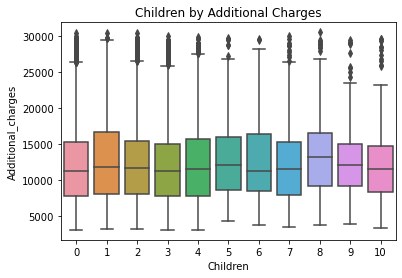

In [121]:
# Distribution of continuous variable "Children" and continuous variable "Additional_charges" using bivariate statistics.
sns.boxplot(x='Children', y='Additional_charges', data=df).set(title='Children by Additional Charges')

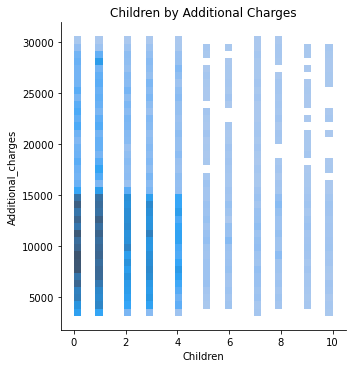

In [122]:
# Distribution of continuous variable "Children" and continuous variable "Additional_charges" using bivariate statistics.
sns.displot(x='Children', y='Additional_charges', data=df).set(title='Children by Additional Charges')

<AxesSubplot:xlabel='Age', ylabel='Additional_charges'>

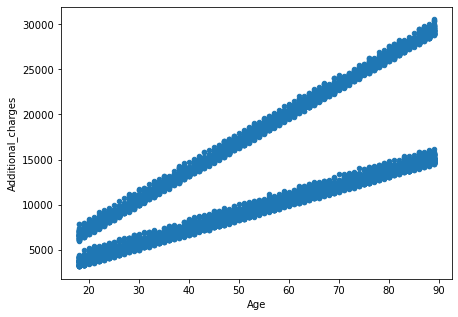

In [123]:
# Visualization of two continuous variables "Age" and "Additional Charges"
df.plot.scatter(x='Age', y='Additional_charges', marker='o', figsize=(7,5))

<AxesSubplot:xlabel='Income', ylabel='Additional_charges'>

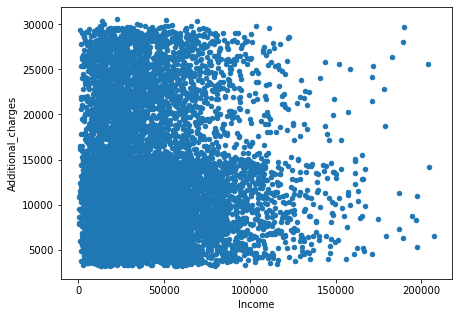

In [124]:
# Visualization of two continuous variables "Income" and "Additional Charges"
df.plot.scatter(x='Income', y='Additional_charges', marker='o', figsize=(7,5))

[Text(0.5, 1.0, 'Doc Visits by Additional Charges')]

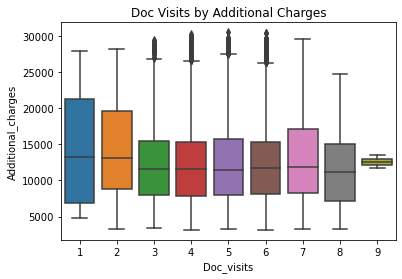

In [125]:
# Distribution of continuous variable "Doc_visits" and continuous variable "Additional_charges" using bivariate statistics.
sns.boxplot(x='Doc_visits', y='Additional_charges', data=df).set(title='Doc Visits by Additional Charges')

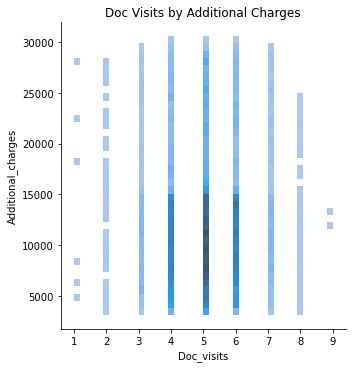

In [126]:
# Distribution of continuous variable "Doc_visits" and continuous variable "Additional_charges" using bivariate statistics.
sns.displot(x='Doc_visits', y='Additional_charges', data=df).set(title='Doc Visits by Additional Charges')

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   CaseOrder                   10000 non-null  int64   
 1   Customer_id                 10000 non-null  object  
 2   Interaction                 10000 non-null  object  
 3   UID                         10000 non-null  object  
 4   City                        10000 non-null  object  
 5   State                       10000 non-null  category
 6   County                      10000 non-null  object  
 7   Zip                         10000 non-null  int64   
 8   Lat                         10000 non-null  float64 
 9   Lng                         10000 non-null  float64 
 10  Population                  10000 non-null  int64   
 11  Area                        10000 non-null  category
 12  TimeZone                    10000 non-null  object  
 13  Job              

In [129]:
# Perform a simple linear regression to find the model intercept and coefficients.

Xreg = df[['HighBlood','Stroke','Overweight','Arthritis','Diabetes',
        'Hyperlipidemia','BackPain','Anxiety','Allergic_rhinitis',
        'Reflux_esophagitis','Asthma', # Medical conditions
        'Gender','Complication_risk', # Categorical variables (reexpressed)
        'Children','Age','Income','Doc_visits']] # Continuous variables

yreg = df[['Additional_charges']]

# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
model = regr.fit(Xreg, yreg)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: [-3091.11852597]
Coefficients: [[ 8.62825355e+03  3.53910311e+02  2.82033515e+01 -5.96245986e+01
   5.26888409e+01  1.68415399e+01 -2.96686755e+01  3.32694371e+01
   3.49687738e+00  2.62334368e+01  5.09240717e+01 -1.34840699e+02
   2.68548734e+02  1.52444054e+01  2.25736435e+02 -6.00065512e-05
  -1.77786131e+01]]


In [130]:
# Finding the variance inflation factor to check for multicollinerarity 
# https://www.statisticshowto.com/variance-inflation-factor/

# These are the independent variables for a 1st test fit.
X1 = df[['HighBlood','Stroke','Overweight','Arthritis','Diabetes',
        'Hyperlipidemia','BackPain','Anxiety','Allergic_rhinitis',
        'Reflux_esophagitis','Asthma', # Medical conditions
        'Gender','Complication_risk', # Categorical variables (reexpressed)
        'Children','Age','Income',  # Continuous variables
        'Doc_visits' # Potential problem variable...
        ]] 

# This is the depenent variable
y = df[['Additional_charges']]

# Create the VIF dataframe.
vif_data = pd.DataFrame()
vif_data["Feature"] = X1.columns

# Calculating VIF for each Feature
vif_data['VIF'] = [variance_inflation_factor(X1.values, i)
                  for i in range(len(X1.columns))]

print(vif_data)

               Feature        VIF
0            HighBlood   1.682371
1               Stroke   1.245149
2           Overweight   3.303026
3            Arthritis   1.542496
4             Diabetes   1.372085
5       Hyperlipidemia   1.490253
6             BackPain   1.688723
7              Anxiety   1.464159
8    Allergic_rhinitis   1.634460
9   Reflux_esophagitis   1.685792
10              Asthma   1.397796
11              Gender   7.971852
12   Complication_risk   8.111149
13            Children   1.912587
14                 Age   6.895140
15              Income   2.916116
16          Doc_visits  14.638405


In [131]:
# Finding the variance inflation factor to check for multicollinerarity 
# https://www.statisticshowto.com/variance-inflation-factor/

# These are the independent variables for a 1st test fit.
X2 = df[['HighBlood','Stroke','Overweight','Arthritis','Diabetes',
        'Hyperlipidemia','BackPain','Anxiety','Allergic_rhinitis',
        'Reflux_esophagitis','Asthma', # Medical conditions
        'Gender','Complication_risk', # Categorical variables (reexpressed)
        'Children','Age','Income',  # Continuous variables
        #'Doc_visits' # Potential problem variable.
        ]] 



# This is the depenent variable
y = df[['Additional_charges']]

# Create the VIF dataframe.
vif_data = pd.DataFrame()
vif_data["Feature"] = X2.columns

# Calculating VIF for each Feature
vif_data['VIF'] = [variance_inflation_factor(X2.values, i)
                  for i in range(len(X2.columns))]

print(vif_data)

               Feature       VIF
0            HighBlood  1.671576
1               Stroke  1.242316
2           Overweight  3.191475
3            Arthritis  1.532191
4             Diabetes  1.364036
5       Hyperlipidemia  1.484766
6             BackPain  1.676400
7              Anxiety  1.457327
8    Allergic_rhinitis  1.622306
9   Reflux_esophagitis  1.673681
10              Asthma  1.394525
11              Gender  7.140638
12   Complication_risk  7.148613
13            Children  1.894633
14                 Age  6.316970
15              Income  2.832163


In [132]:
# with statsmodels show the OLS regression results for the initial model. 
X1 = sm.add_constant(X1) # adding a constant
 
model1 = sm.OLS(y, X1).fit()
predictions = model1.predict(X1) 
 
print_model = model1.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     Additional_charges   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     8724.
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        14:10:53   Log-Likelihood:                -88231.
No. Observations:               10000   AIC:                         1.765e+05
Df Residuals:                    9982   BIC:                         1.766e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3091.1185    123

In [133]:
# with statsmodels starting to reduce the model. This is version 2. 
X2 = sm.add_constant(X2) # adding a constant
 
model2 = sm.OLS(y, X2).fit()
predictions = model2.predict(X2) 
 
print_model = model2.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     Additional_charges   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     9269.
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        14:11:14   Log-Likelihood:                -88232.
No. Observations:               10000   AIC:                         1.765e+05
Df Residuals:                    9983   BIC:                         1.766e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3178.5565     96

In [134]:
# Finding the variance inflation factor to check for multicollinerarity 
# Starting to reject P-values.
# https://machinelearningmind.com/2019/10/14/feature-elimination-using-p-values/

# These are the independent variables for a 1st test fit.
X3 = df[['HighBlood',
         'Stroke',
         #'Overweight',# P-value = 0.445. Remove this to see if the R-values increase.
         #'Arthritis', # P-value = 0.091. Remove this to see if the R-values increase.
         #'Diabetes', # P-value = 0.156. Remove this to see if the R-values increase.
         #'Hyperlipidemia', # P-value = 0.608. Remove this to see if the R-values increase.
         #'BackPain', # P-value = 0.380. Remove this to see if the R-values increase.
         #'Anxiety', # P-value = 0.359. Remove this to see if the R-values increase.
         #'Allergic_rhinitis', # P-value = 0.919. Remove this to see if the R-values increase.
         #'Reflux_esophagitis', # P-value = 0.435. Remove this to see if the R-values increase.
         #'Asthma', # P-value = 0.146. Remove this to see if the R-values increase.
         'Gender',
         'Complication_risk',
         'Children',
         'Age',
         #'Income' # P-value = 0.904. Remove this to see if the R-values increase.
        #'Doc_visits' #Removed
        ]] 



# This is the depenent variable
y = df[['Additional_charges']]

# Create the VIF dataframe.
vif_data = pd.DataFrame()
vif_data["Feature"] = X3.columns

# Calculating VIF for each Feature
vif_data['VIF'] = [variance_inflation_factor(X3.values, i)
                  for i in range(len(X3.columns))]

print(vif_data)

             Feature       VIF
0          HighBlood  1.656144
1             Stroke  1.239812
2             Gender  6.375193
3  Complication_risk  6.421540
4           Children  1.875810
5                Age  5.816982


In [135]:
# with statsmodels starting to reduce the model. This is version 2. 
X3 = sm.add_constant(X3) # adding a constant
 
model3 = sm.OLS(y, X3).fit()
predictions = model3.predict(X3) 
 
print_model = model3.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     Additional_charges   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                 2.472e+04
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        14:11:53   Log-Likelihood:                -88237.
No. Observations:               10000   AIC:                         1.765e+05
Df Residuals:                    9993   BIC:                         1.765e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -3137.5861     83.31

In [136]:
# Residuals for the model
df['Additional_charges_pred'] = model3.predict(X3)
df['Residuals'] = model3.resid
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,Item6,Item7,Item8,Z_Score_Additional_charges,Z_Score_Children,Z_Score_Age,Z_Score_Income,Z_Score_Doc_visits,Additional_charges_pred,Residuals
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3,3,4,0.765005,-0.507129,-0.024795,1.615914,0.944647,17871.061187,68.342233
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4,3,3,0.715114,0.417277,-0.121706,0.221443,-0.967981,17584.203441,28.794679
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,4,3,3,0.698635,0.417277,-0.024795,-0.915870,-0.967981,17766.992375,-261.799915
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,5,5,5,0.009004,-0.969332,1.186592,-0.026263,-0.967981,15224.876422,-2231.439072
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,3,4,3,-1.408991,-0.507129,-1.526914,-1.377325,-0.011667,1842.138908,1874.386878


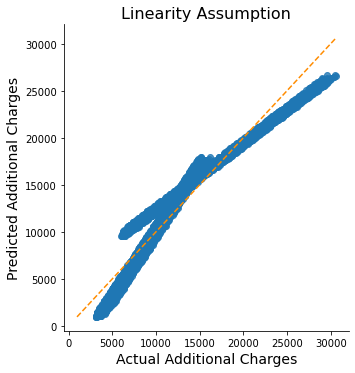

In [137]:
# Plotting the observed vs predicted values
sns.lmplot(x='Additional_charges', y='Additional_charges_pred', data=df, fit_reg=False, height=5)
    
# Plotting the diagonal line
line_coords = np.arange(df[['Additional_charges', 'Additional_charges_pred']].min().min()-10, 
                        df[['Additional_charges', 'Additional_charges_pred']].max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('Predicted Additional Charges', fontsize=14)
plt.xlabel('Actual Additional Charges', fontsize=14)
plt.title('Linearity Assumption', fontsize=16)
plt.show()

p-value from the test Anderson-Darling test below 0.05 generally means non-normal: 0.0


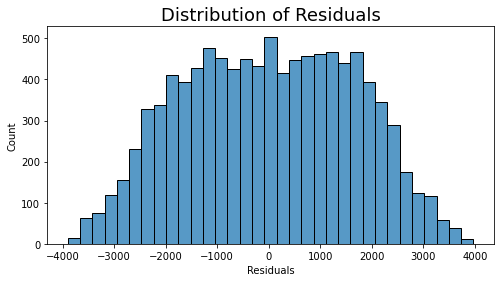

Residuals are not normally distributed


In [138]:
# Performing the test on the residuals
p_value = normal_ad(df['Residuals'])[1]
print('p-value from the test Anderson-Darling test below 0.05 generally means non-normal:', p_value)

# Plotting the residuals distribution
plt.subplots(figsize=(8, 4))
plt.title('Distribution of Residuals', fontsize=18)
sns.histplot(df['Residuals'])
plt.show()

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

<function matplotlib.pyplot.show(close=None, block=None)>

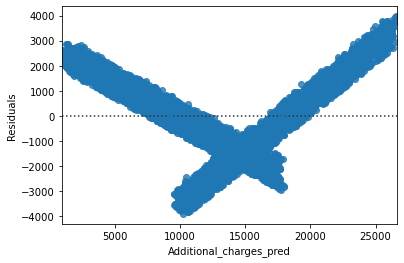

In [139]:
# Visualization of Residuals and Additional_charges_pred
sns.residplot(x='Additional_charges_pred', y='Residuals', data=df, lowess=True)
plt.xlabel('Additional_charges_pred')
plt.ylabel('Residuals')
plt.show

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   CaseOrder                   10000 non-null  int64   
 1   Customer_id                 10000 non-null  object  
 2   Interaction                 10000 non-null  object  
 3   UID                         10000 non-null  object  
 4   City                        10000 non-null  object  
 5   State                       10000 non-null  category
 6   County                      10000 non-null  object  
 7   Zip                         10000 non-null  int64   
 8   Lat                         10000 non-null  float64 
 9   Lng                         10000 non-null  float64 
 10  Population                  10000 non-null  int64   
 11  Area                        10000 non-null  category
 12  TimeZone                    10000 non-null  object  
 13  Job              

Pearson correlation coefficient matrix of each variables:
                    HighBlood    Stroke    Gender  Complication_risk  Children  \
HighBlood           1.000000  0.007568 -0.000156           0.021368  0.001923   
Stroke              0.007568  1.000000  0.005390           0.001119  0.005123   
Gender             -0.000156  0.005390  1.000000           0.002923  0.003313   
Complication_risk   0.021368  0.001119  0.002923           1.000000  0.003681   
Children            0.001923  0.005123  0.003313           0.003681  1.000000   
Age                 0.007147  0.012035  0.015970           0.002887  0.009836   

                        Age  
HighBlood          0.007147  
Stroke             0.012035  
Gender             0.015970  
Complication_risk  0.002887  
Children           0.009836  
Age                1.000000  


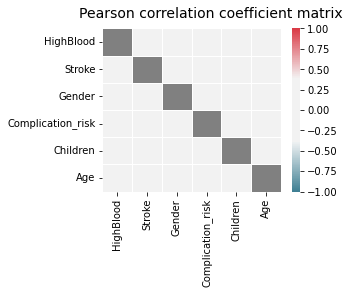

In [141]:
corr = df[['HighBlood',
         'Stroke',
         #'Overweight',# P-value = 0.445. Remove this to see if the R-values increase.
         #'Arthritis', # P-value = 0.091. Remove this to see if the R-values increase.
         #'Diabetes', # P-value = 0.156. Remove this to see if the R-values increase.
         #'Hyperlipidemia', # P-value = 0.608. Remove this to see if the R-values increase.
         #'BackPain', # P-value = 0.380. Remove this to see if the R-values increase.
         #'Anxiety', # P-value = 0.359. Remove this to see if the R-values increase.
         #'Allergic_rhinitis', # P-value = 0.919. Remove this to see if the R-values increase.
         #'Reflux_esophagitis', # P-value = 0.435. Remove this to see if the R-values increase.
         #'Asthma', # P-value = 0.146. Remove this to see if the R-values increase.
         'Gender',
         'Complication_risk',
         'Children',
         'Age',
         #'Income' # P-value = 0.904. Remove this to see if the R-values increase.
        #'Doc_visits' #Removed
        ]].corr()

print('Pearson correlation coefficient matrix of each variables:\n', corr)

# Generate a mask for the diagonal cell
mask = np.zeros_like(corr, dtype=bool)
np.fill_diagonal(mask, val=True)

# Initialize matplotlib figure
fig, ax = plt.subplots(figsize=(4, 3))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)
cmap.set_bad('grey')

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)
fig.suptitle('Pearson correlation coefficient matrix', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)
# fig.tight_layout()